Analysis of [Telco's](http://telco.com.br/) customer database, with information about the attributes of its customers.

The intention is to predict customers with greater potential to leave the company.

The data is taken from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) and below is the information about the Dataset. 

" Telcom Customer Churn

The data was downloaded from IBM Sample Data Sets. 
https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/ "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target." 



### Import the basic and required libraries


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

### Read the data into a dataframe and split the target variable and features in two. 


In [2]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
X = data.drop(['Churn'], axis=1)
y = pd.DataFrame(data.Churn)


In [4]:
y = pd.DataFrame(data.Churn)
print(X.shape)
print(y.shape)

(7043, 20)
(7043, 1)


#### We have 7043 instances and 20 features for predicting whether a customer churn or not? 

### Initial Data Analysis 

1. Check for the categorical and continuous features. 
2. Check for hte null values 

In [5]:
X.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [6]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


1. Continuous  = 'tenure', 'MonthlyCharges', 'TotalCharges'
2. Categorical = 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod' 

In [7]:
X.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [8]:
y.isnull().sum()

Churn    0
dtype: int64

In [9]:
X.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [10]:
y.describe()

,Churn
count,7043
unique,2
top,No
freq,5174


Since, there are no null values, we can move ahead. 

## Data Visualization

In [11]:
## Check for the sekwedness in target variable

0.7346301292063041 0.2653698707936959


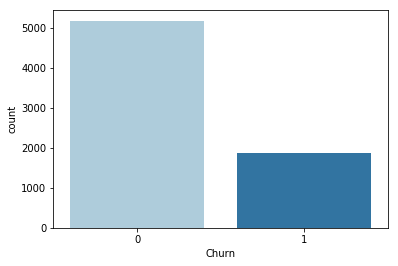

In [12]:
y = y.squeeze().apply(lambda x: 1 if x =='Yes' else 0)

ax = sns.countplot(y,label="Count", palette=sns.color_palette("Paired")) 
NotChurned, Churned = y.value_counts()

print(NotChurned/y.shape[0], Churned/y.shape[0])

The 27% of customers who churned using the service, whereas the 73 % of people retained the services. 

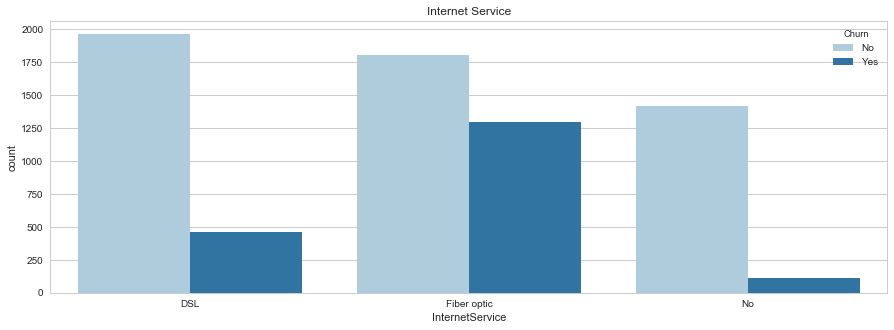

In [164]:
plt.figure(figsize = (15,5))
plt.title("Internet Service")
sns.countplot(data.InternetService, hue = data.Churn , palette=sns.color_palette("Paired"))

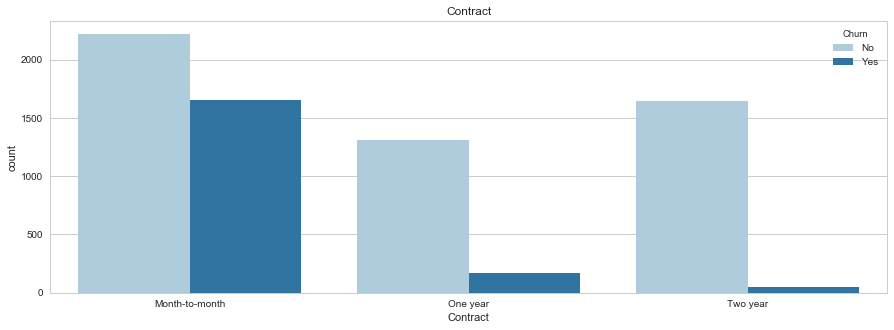

In [165]:
plt.figure(figsize = (15,5))
sns.countplot(data.Contract, hue = data.Churn, palette=sns.color_palette("Paired"))

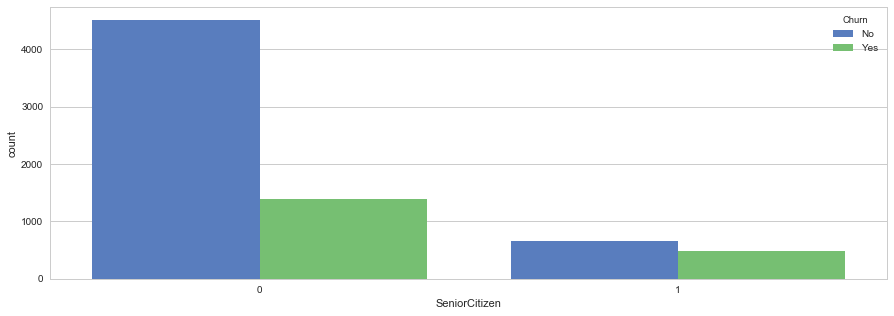

In [140]:
plt.figure(figsize = (15,5))
sns.countplot(data.SeniorCitizen, hue = data.Churn, palette=sns.color_palette("Paired"))

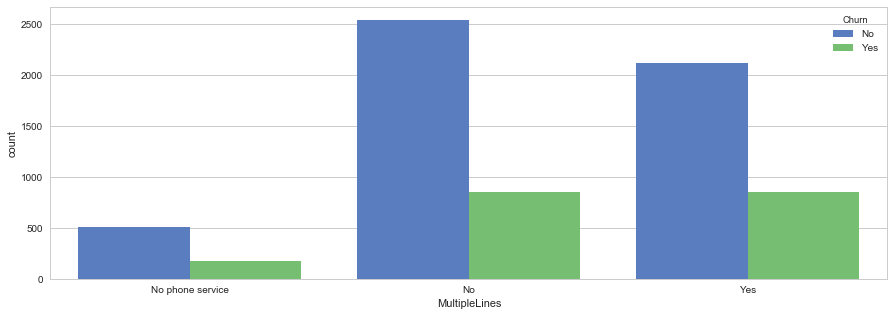

In [141]:
plt.figure(figsize = (15,5))
sns.countplot(data.MultipleLines, hue = data.Churn, palette=sns.color_palette("Paired"))

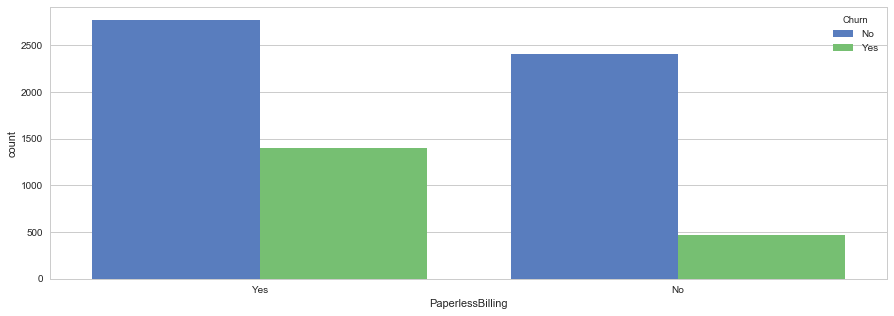

In [142]:
plt.figure(figsize = (15,5))
sns.countplot(data.PaperlessBilling, hue = data.Churn ,palette=sns.color_palette("Paired"))

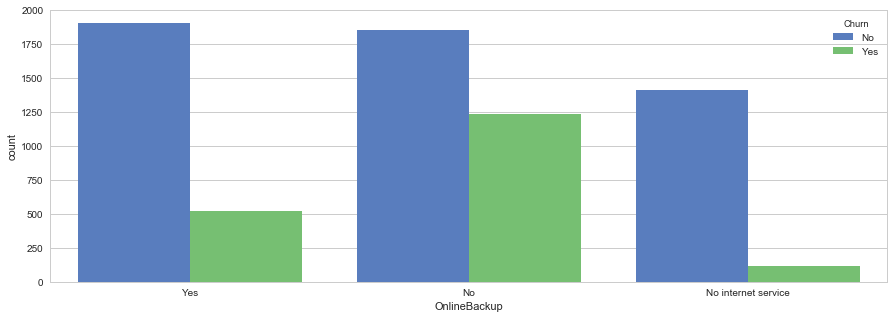

In [145]:
plt.figure(figsize = (15,5))
sns.countplot(data.OnlineBackup, hue = data.Churn ,palette=sns.color_palette("Paired"))

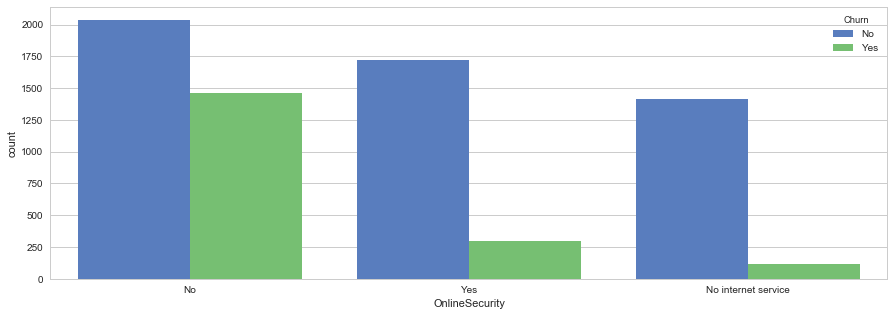

In [146]:
plt.figure(figsize = (15,5))
sns.countplot(data.OnlineSecurity, hue = data.Churn ,palette=sns.color_palette("Paired"))

## Checking the correlation between the variables. 

1. Before checkign the correlation we need to convert the categorical values to numerical ones.
2. Removing the customer id column, since it's non-relevant in modeling.



In [13]:
X.drop(['customerID'], inplace=True, axis=1 )
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [14]:
X['gender'] = X.gender.apply(lambda x: 1 if x.upper() == 'MALE' else 0 )
X['Partner'] = X.Partner.apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['Dependents'] = X['Dependents'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['PhoneService'] = X['PhoneService'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['OnlineSecurity'] = X['OnlineSecurity'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['OnlineBackup'] = X['OnlineBackup'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['DeviceProtection'] = X['DeviceProtection'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['TechSupport'] = X['TechSupport'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['PaperlessBilling'] = X['PaperlessBilling'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )
X['MultipleLines'] = X['MultipleLines'].apply(lambda x: 1 if x.upper() == 'YES' else 0 )


CSMap = {'Month-to-month':0, 'One year':1, 'Two year':2}
X['Contract'] = X['Contract'].apply(lambda x: CSMap[x])
ISMap = {'DSL':1, 'Fiber optic':2, 'No':0}
X['InternetService'] = X['InternetService'].apply(lambda x: ISMap[x])
PMMap = {'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)' :2,
       'Credit card (automatic)' :3 }
X['PaymentMethod'] = X['PaymentMethod'].apply(lambda x: PMMap[x])
STMap = {'Yes':1, 'No internet service':2, 'No':0}
X['StreamingTV'] = X['StreamingTV'].apply(lambda x: STMap[x])
X['StreamingMovies'] = X['StreamingMovies'].apply(lambda x: STMap[x])
X['TotalCharges'] = X.TotalCharges.convert_objects(convert_numeric=True)

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [15]:
X.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

After Changing the data-type of the Total charges column, there are 11 null values. 

So removing those values and moving forward with normalization. 

In [16]:
X.dropna(how='any', inplace=True)
X.shape

(7032, 19)

In [17]:
y.drop(list(set(y.index).difference(set(X.index))), inplace=True)
y.shape

(7032,)

In [18]:

X.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,1.224118,0.286547,0.344852,0.343857,0.290102,0.816695,0.820677,0.688567,0.592719,1.315557,64.798208,2283.300441
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.778643,0.452180,0.475354,0.475028,0.453842,0.762952,0.761287,0.832934,0.491363,1.149523,30.085974,2266.771362
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000


#### Quick check for the max total charges values, is it related to the long tenure or a data issue 
From the below check, it seems the data is fine, for a long tenure, the total charges would be high and expected. 

In [19]:
X.loc[X.TotalCharges.idxmax()]

gender                 1.0
SeniorCitizen          0.0
Partner                1.0
Dependents             0.0
tenure                72.0
PhoneService           1.0
MultipleLines          1.0
InternetService        2.0
OnlineSecurity         1.0
OnlineBackup           1.0
DeviceProtection       1.0
TechSupport            1.0
StreamingTV            1.0
StreamingMovies        1.0
Contract               1.0
PaperlessBilling       1.0
PaymentMethod          2.0
MonthlyCharges       117.8
TotalCharges        8684.8
Name: 4610, dtype: float64

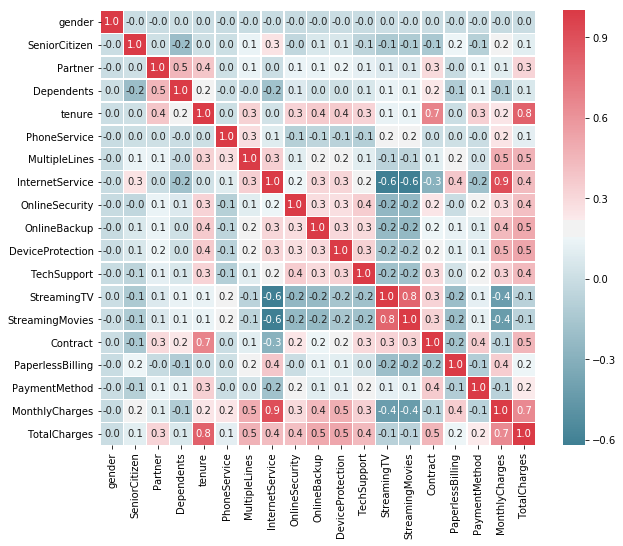

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, linewidths=.5, fmt= '.1f', ax=ax)

From the correlation plot, the tenure is highly correlated to Total charges and Contract which seems to be make sense. 

The total charges will depend upon the tenure for the service taken for the contract. 

The variable Monthly Charges and Internet service are aslo highly correlated. 

The Total charges is also having high correlation with the Monthly charges. The total charges might be a cumulative sum of the monthly charges for the contract or tenure. 

Rest of the features seems to be Ok. 

Generate swarm plot for the features for first few 1000 rows

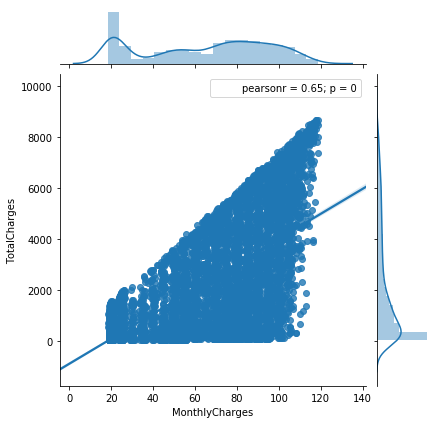

In [21]:
sns.jointplot(X['MonthlyCharges'], X['TotalCharges'],kind="reg")

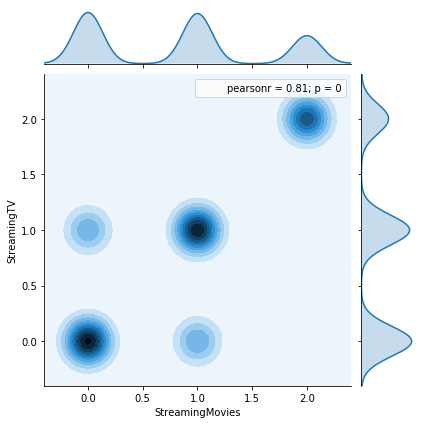

In [22]:
sns.jointplot(X['StreamingMovies'], X['StreamingTV'], kind="kde")

'''
The totalcharges and monthly charges have high correlation between them and we can use a single feature instead of both. 

The totalcharges is usually a cumulative sum of the monthly charges for the services opted. 

Hence we can create a new feature as TotalCharges/MonthlyCharges.  

Same is the case with the monthly charges and the internet services. The more services opted by the customer, higher the charges. 

Hence we can create a new feature charge = MonthlyCharges*InternetService

The customers with streaming services also have high correlation with the StreamingTV and STreamingMovies feature. 

Hence we can create a new feature StreamingService = StreamingTV + STreamingMovies

X['AvgCharges'] = X['TotalCharges'] / X['MonthlyCharges']
X['ChargeForService'] = X['MonthlyCharges'] *  X['InternetService']
X['StreamingService'] = X['StreamingTV'] *  X['StreamingMovies']

f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True, linewidths=.5, fmt= '.1f', ax=ax)
            
'''

#### Generating swarmplots for visualizing the variance for the different columns. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

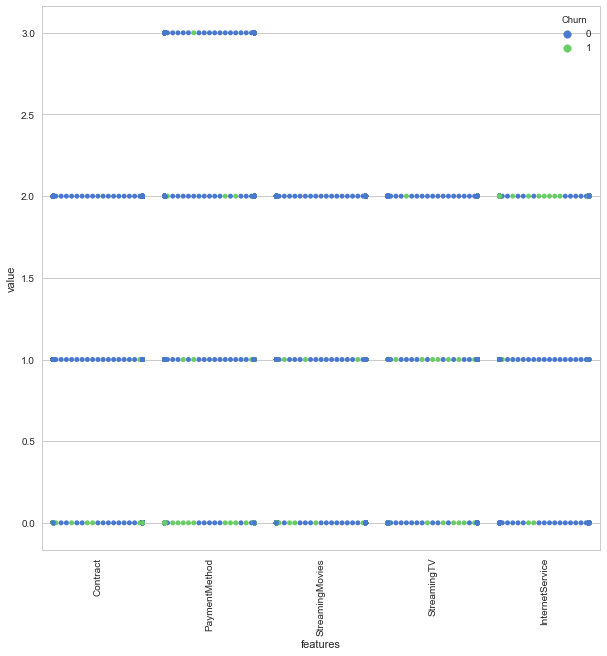

In [35]:
import time
sns.set(style="whitegrid", palette="muted")

df = pd.concat([y.iloc[:1000],X.iloc[:1000][['Contract','PaymentMethod','StreamingMovies', 'StreamingTV','InternetService']]],axis=1)
df = pd.melt(df,id_vars="Churn",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="Churn", data=df)

plt.xticks(rotation=90)


### From the above swarm plots

The customers having either Streaming Services or not seems to be chruned more as compare to having no Internet service.
This would be a good feature for our classification of the customers for churning. 

The people having month-to-month contract also have high probability of churning as compared to people with long term contracts. 

We can also see that people with Payment Method as electronic check and mailed check have higher churning rate as compared to the automatic mode of payment. 
Since, people having automatic mode of payment tends to use th service for a longer time. 



### Normalization

Before Moving Forward, normalizing the values for the features so they all are in same ranges. 

Performing it for both the dataframes . 'X' and 'XHighVar' using MinMaxScaler(). 

This would help in faster execution of our models.

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()

In [27]:
X.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,1.224118,0.286547,0.344852,0.343857,0.290102,0.816695,0.820677,0.688567,0.592719,1.315557,64.798208,2283.300441
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.778643,0.452180,0.475354,0.475028,0.453842,0.762952,0.761287,0.832934,0.491363,1.149523,30.085974,2266.771362
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1397.475000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000


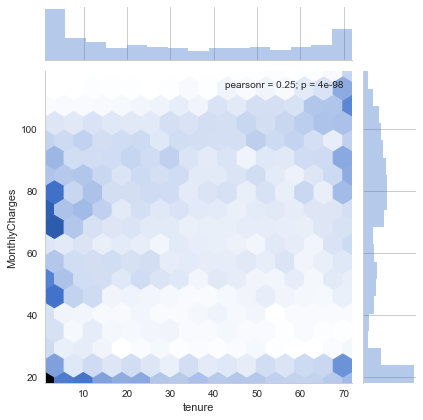

In [28]:
sns.jointplot(X.tenure, X.MonthlyCharges,kind='hex')

In [29]:
xNorm = scaled.fit_transform(X)
xNorm = pd.DataFrame(xNorm, columns=X.columns)
print(xNorm.shape, y.shape)
print(xNorm.isnull().sum())

(7032, 19) (7032,)
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [30]:
#xNorm = pd.DataFrame(xNorm)
xNorm.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.612059,0.286547,0.344852,0.343857,0.290102,0.408348,0.410338,0.344283,0.592719,0.438519,0.463166,0.261309
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.389322,0.452180,0.475354,0.475028,0.453842,0.381476,0.380644,0.416467,0.491363,0.383174,0.299363,0.261571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172512,0.044155
50%,1.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,1.000000,0.333333,0.518408,0.159090
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,0.500000,1.000000,0.666667,0.712562,0.435719
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Generating the pair plots 

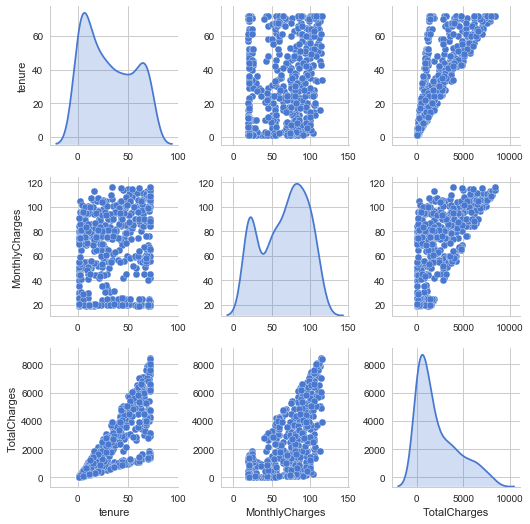

In [81]:
sns.pairplot(X.iloc[:500][['tenure','MonthlyCharges','TotalCharges']],
             diag_kind = "kde",palette = "husl",diag_kws=dict(shade=True))
plt.show()

## Building Model and Feature Engineering

Step 1: Will use all the features after removing the highly correlated features.

Step 2: Select the features using sklearn.feature_selection. 

Step 3: Select the features using the  Recursive feature elimination method. 

After each of the steps will calculate the model accuracy using 10 fold Cross validation. 

####  Features after removing the highly correlated features.

In [36]:
xNew = pd.DataFrame(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneService', 'MultipleLines', 
                             'InternetService' ,'OnlineBackup', 'DeviceProtection', 'TechSupport', 'OnlineSecurity','PaperlessBilling', 'PaymentMethod',
                             'StreamingTV','TotalCharges'])

In [37]:
xNew = xNorm[xNew.columns]

In [38]:
#xNorm.drop(['AvgCharges', 'StreamingService'], axis=1, inplace=True)

#### Selecting Features using SelectKBest 

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=10).fit(xNorm, y)

In [40]:
fscore = select_feature.scores_
fDF = pd.DataFrame([fscore, xNorm.columns], index=['Score', 'Columns'])
fDF = fDF.transpose()
fDF.sort_values(['Score'], axis=0,ascending=False, inplace=True)
xTop10Feat = fDF.iloc[:10,1]

In [41]:
xTop10Feat

14           Contract
4              tenure
7     InternetService
16      PaymentMethod
8      OnlineSecurity
11        TechSupport
1       SeniorCitizen
3          Dependents
13    StreamingMovies
12        StreamingTV
Name: Columns, dtype: object

# Checking Model Accuracy with different Classifiers 

##### Import the different classifiers from sklearn and metrics for model comparison

In [42]:
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, KFold,cross_val_predict

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix

###  Split the dataset into training and testing data for feature without correlation. 

In [43]:
## This is the step 1 so we will use the xNew df

X_train, X_test, y_train, y_test = train_test_split(xNew, y, test_size=0.20, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 16) (5625,)
(1407, 16) (1407,)


In [184]:
## Created a dictionary for easily accessing all the classifiers. 

clfs = {
    'svm1': SVC(kernel='linear'),
    'svm2': SVC(kernel='rbf'),
    'svm3': SVC(kernel='sigmoid'),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(hidden_layer_sizes=[100,100 ]),
    'rfc': RandomForestClassifier(),
    'lr': LogisticRegression()
}


In [185]:
## Create a dictionary for keeping the accuracy for each classifier
def executeClassifiers(X_train, y_train, X_test, y_test):     
    test_acc = dict()
    train_acc = dict()
    confMatrix =dict()
    for clf_name in clfs:
        kfold = KFold(n_splits=10, shuffle=True)
        clf = clfs[clf_name]
        print(clf)
        cv_acc = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
        y_pred = cross_val_predict(clf, X_test,y_test)
        test_acc[clf_name] = accuracy_score(y_test, y_pred)
        train_acc[clf_name] = cv_acc.mean()
        confMatrix[clf_name] = confusion_matrix(y_test,y_pred)
    return train_acc, test_acc , confMatrix

In [186]:
def getaccMatrix(train, test):
    acc_matrix = pd.DataFrame([train, test],columns=train.keys(), index=['Train','Test'])
    acc_matrix = np.transpose(acc_matrix)
    return acc_matrix

def plotConfMatrix(cm, classifier):
    heatmap = sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
    print("Recall = " + str(cm[0][0] / (cm[0][0] + cm[1][0])))
    print("Precision = " + str(cm[0][0] / ( cm[0][0] + cm[0][1])))
    heatmap.set_xlabel("True Labels")
    heatmap.set_ylabel("Predicted Labels")
    heatmap.set_title("Confusion Matrix for Classifier: " + classifier)
    return heatmap

In [187]:
train, test, confMatrix = executeClassifiers(X_train, y_train, X_test, y_test)
acc_matrix = getaccMatrix(train, test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=Non

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 100], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', 

In [188]:
acc_matrix.sort_values('Train',ascending=False, inplace=True)
acc_matrix

,Train,Test
mlp1,0.795027,0.791756
mlp2,0.794315,0.781095
svm1,0.791648,0.798863
lr,0.791465,0.795309
svm3,0.789515,0.773276
svm2,0.788797,0.793888
rfc,0.769245,0.778252


From the above matrix we get the highest accuracy for the MLP1 classifier and the logistic regression 
whereas, the least performer is RFC and the svm2 classifier.

###  Confusion matrix for the two top performer Classifier

Recall = 0.8349514563106796
Precision = 0.8992395437262357


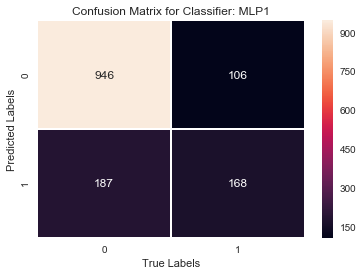

In [190]:
plotConfMatrix(confMatrix['mlp1'], 'MLP1')

Recall = 0.8333333333333334
Precision = 0.9077946768060836


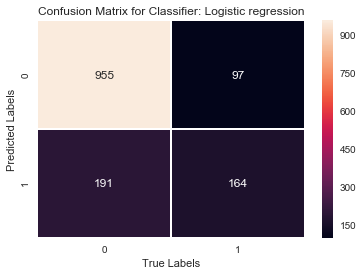

In [191]:
plotConfMatrix(confMatrix['lr'], 'Logistic regression')

From the confusion matrix for the MLP1, we are getting a high precision rate, but a lower recall value. 
Whereas for the logistic regression, we are getting both high precision and recall values. 
These are based on a random test set, so the values will differ with each run, but gives us a good feel about our model.

In [194]:
xTop10Feat

14           Contract
4              tenure
7     InternetService
16      PaymentMethod
8      OnlineSecurity
11        TechSupport
1       SeniorCitizen
3          Dependents
13    StreamingMovies
12        StreamingTV
Name: Columns, dtype: object

###  Split the dataset into training and testing data for top 10 features and calculate model accuracy

In [195]:
## This is the step 1 so we will use the xNew df

X_train, X_test, y_train, y_test = train_test_split(xNorm[xTop10Feat], y, test_size=0.20, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 10) (5625,)
(1407, 10) (1407,)


In [196]:
train, test, confMatrix = executeClassifiers(X_train, y_train, X_test, y_test)
top10FeatAccMatrix = getaccMatrix(train, test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=Non

/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/pratikshrivastava/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[100, 100], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', 

In [197]:
top10FeatAccMatrix.sort_values('Train', ascending=False, inplace=True)
top10FeatAccMatrix

,Train,Test
mlp1,0.796267,0.788202
mlp2,0.792182,0.762615
lr,0.790759,0.795309
svm1,0.790041,0.798863
svm2,0.789870,0.793888
svm3,0.789867,0.773276
rfc,0.773336,0.771855


Confusion Matrix for the Top 10 Feature. 

Recall = 0.830122591943958
Precision = 0.9011406844106464


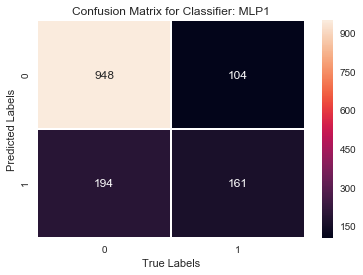

In [198]:
plotConfMatrix(confMatrix['mlp1'], 'MLP1')

Recall = 0.8333333333333334
Precision = 0.9077946768060836


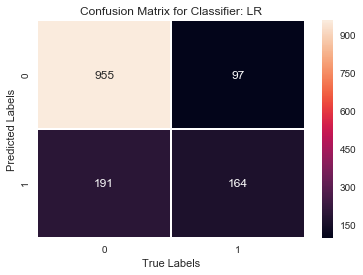

In [199]:
plotConfMatrix(confMatrix['lr'], 'LR')

In [201]:
from sklearn.feature_selection import RFECV

#estimator = SVC(kernel='sigmoid')
estimator = LogisticRegression()
selector = RFECV(estimator, step=1, cv=10,scoring='accuracy')
selector = selector.fit(X_train, y_train)

fData = pd.DataFrame([range(1, len(selector.grid_scores_) + 1),selector.grid_scores_], index=['Features', 'Scores']).T

In [202]:
print('Best features :', X_train.columns[selector.support_])
selector.grid_scores_

Best features : Index(['Contract', 'tenure', 'InternetService', 'PaymentMethod',
       'OnlineSecurity', 'TechSupport', 'SeniorCitizen', 'Dependents',
       'StreamingMovies', 'StreamingTV'],
      dtype='object')


array([0.75075489, 0.78471412, 0.78489332, 0.78649411, 0.7880908 ,
       0.78862555, 0.78862461, 0.79022445, 0.79146464, 0.79200002])

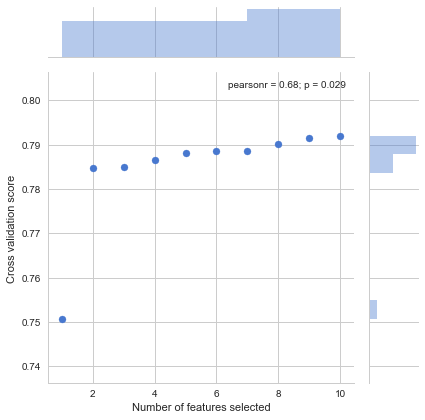

In [203]:
fData = pd.DataFrame([range(1, len(selector.grid_scores_) + 1),selector.grid_scores_], index=['Features', 'Scores']).T
ax = sns.jointplot(x='Features', y='Scores', data=fData, space=0.3)
ax.set_axis_labels(xlabel="Number of features selected", ylabel="Cross validation score ")


In [204]:
## This is the step 1 so we will use the xNew df

X_train, X_test, y_train, y_test = train_test_split(xNorm[X_train.columns[selector.support_]], y, test_size=0.20, random_state=101)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5625, 10) (5625,)
(1407, 10) (1407,)


In [205]:
X_train.columns[selector.support_]

Index(['Contract', 'tenure', 'InternetService', 'PaymentMethod',
       'OnlineSecurity', 'TechSupport', 'SeniorCitizen', 'Dependents',
       'StreamingMovies', 'StreamingTV'],
      dtype='object')

In [ ]:
train, test, confMatrix = executeClassifiers(X_train, y_train, X_test, y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [ ]:
topFeatAccMatrix = getaccMatrix(train, test)

In [ ]:
topFeatAccMatrix.sort_values("Train", ascending=False)


In [ ]:
parameters = {'solver': ['lbfgs','sgd'], 'max_iter': [150,200,250],'hidden_layer_sizes':np.arange(50, 60), 'alpha': 10.0 ** -np.arange(3, 5)
              ,'random_state':[0,1,2,3]}
clf_grid = GridSearchCV(MLPClassifier(), parameters)


In [ ]:
#clf_grid.fit(X_train,y_train)

In [ ]:
print(clf_grid.best_params_)

In [ ]:
clf = MLPClassifier(alpha= 0.001, hidden_layer_sizes=(7), max_iter=150, random_state=0, solver='lbfgs')
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)